# **딥러닝 프레임워크란?**
- 좋은 도구는 오류를 줄이고, 개발 속도를 높이며, 실행 성능을 향상시킵니다.
> 딥러닝 프레임워크가 만들어진 이유 : **코드 복잡도를 완화**시키기 위해서!
> (+ppt)

# **텐서를 소개합니다.**
- 텐서는 벡터와 행렬의 추상적 형태입니다.

> 행렬은 벡터의 리스트, 벡터는 스칼라(단일 숫자)의 리스트. 마찬가지로 텐서(tensor)는 숫자의 중첩된 리스트를 이러한 형태로 추상화한 버전.

> 벡터는 1차원 텐서, 행렬은 2차원 텐서 ... n차원 텐서

In [1]:

import numpy as np

class Tensor (object):
    
    def __init__(self, data):
        self.data = np.array(data)
    
    def __add__(self, other):
        return Tensor(self.data + other.data)
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())
    
x = Tensor([1,2,3,4,5])
print(x)

y = x + x
print(y)

[1 2 3 4 5]
[ 2  4  6  8 10]


##추가) **self** 연산자 & **Class**
> `self`는 객체의 인스턴스 그 자체를 의미한다. 대부분 객체지향 언어는 이걸 메소드에 안 보이게 전달하지만 파이썬에서 클래스의 메소드를 정의할 때는 `self`를 꼭 명시해하고 그 메소드를 불러올 때 `self`는 자동으로 전달된다.

> 객체를 호출할 때 호출한 객체 자신이 전달되기 때문에 self를 사용한 것! self 말고 다른 이름을 사용해도 상관없다.

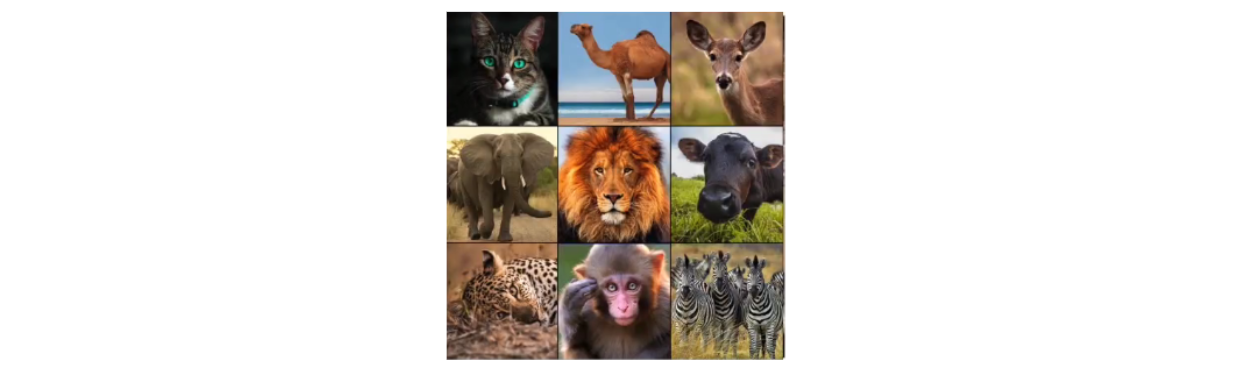

In [2]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


**Calculator 클래스**로 만든 별개의 계산기 `cal1`, `cal2`(파이썬에서는 이것을 **객체**라고 부른다)가 각각의 역할을 수행한다. 그리고 계산기(`cal1`, `cal2`)의 결괏값 역시 다른 계산기의 결괏값과 상관없이 독립적인 값을 유지한다. 클래스를 사용하면 계산기 대수가 늘어나더라도 **객체**를 생성만 하면 되기 때문에 함수를 사용하는 경우와 달리 매우 간단해진다.

In [0]:
#사칙연산을 수행하는 FourCal class를 만들어보자!

class FourCal:                        # class 지정 --> FourCal()

     def setdata(self, first, second):# ① method의 매개변수
      self.first = first              # ② method의 수행문
      self.second = second            # ② method의 수행문

In [7]:
a = FourCal()
a.setdata(4, 2)

print(a.first)
print(a.second)

4
2


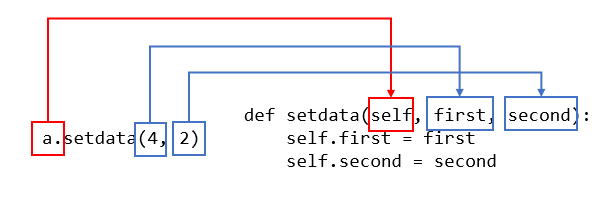

# **자동 미분, autograd를 소개합니다.**
- 지금까지 여러분은 수동으로 역전파를 해왔습니다. 이젠 자동화해보세요!

> 앞서 단원에서는 신경망 출력에서 기울기를 계산한 뒤, 이 계산 결과를 끝에서 두 번째 구성요소의 미분계수 계산에 이용했다. 이를 아키텍처 내부의 모든 가중치가 정확한 기울기를 갖게 될 때까지 이 과정을 반복한다. 이를 **자동화** 해보자!

In [0]:
import numpy as np

class Tensor (object):
    
    def __init__(self, data, creators=None, creation_op = None):
        self.data = np.array(data)
        self.creation_op = creation_op
        self.creators = creators
        self.grad = None
    
    def backward(self, grad):
        self.grad = grad
        
        if(self.creation_op == "add"):
            self.creators[0].backward(grad)
            self.creators[1].backward(grad)

    def __add__(self, other):
        return Tensor(self.data + other.data,  creators=[self,other], creation_op="add")
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())
    
x = Tensor([1,2,3,4,5])
y = Tensor([2,2,2,2,2])

z = x + y
z.backward(Tensor(np.array([1,1,1,1,1])))

creators : 현재 텐서를 생성할 때 사용된 텐서 값을 담는 기본값이 **None**인 리스트.
- z의 경우, x와 y인 2개의 creators를 가짐.

creation_op : 생성 과정에서 사용된 creators가 사용한 명령어를 저장.
- z = x + y 를 수행하면 노드 3개 (x, y, z) 이를 잇는 엣지 2개로 이루어진 **계산 그래프(computation graph)**가 생성됨. (아래 그림) 

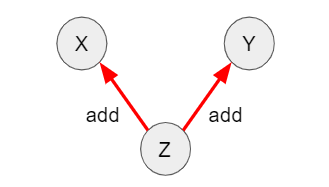

첫 번째 개념. 수학 연산을 수행할 때마다 이 그래프를 자동으로 생성

두 번째 개념. 경사도 계산을 위한 그래프 활용 능력
- z.backward() 메소드 호출시, z 생성에 사용된 함수(add)에 x, y에 대한 정확한 경사도 값을 보낸다. 

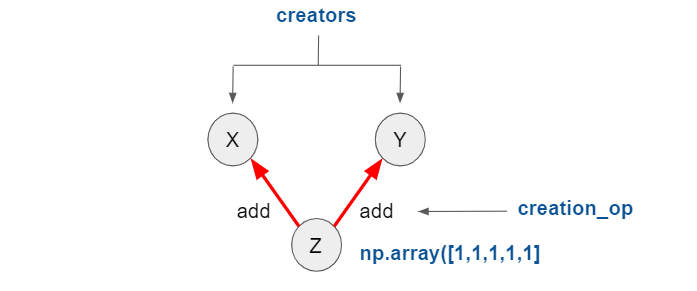

In [11]:
print(x.grad)
print(y.grad)
print(z.creators)
print(z.creation_op)
print(x.creators)
print(y.creators)

[1 1 1 1 1]
[1 1 1 1 1]
[array([1, 2, 3, 4, 5]), array([2, 2, 2, 2, 2])]
add
None
None


각 벡터가 자신의 모든 `self.creators`에 대해 `.backward()`를 호출하기 때문에 **재귀적으로 동작**!

> 재귀적이란?
>
> 본래 있던 곳으로 다시 돌아가거나 돌아오는 것.

In [15]:
a = Tensor([1,2,3,4,5])
b = Tensor([2,2,2,2,2])
c = Tensor([5,4,3,2,1])
d = Tensor([-1,-2,-3,-4,-5])

e = a + b
f = c + d
g = e + f

g.backward(Tensor(np.array([1,1,1,1,1])))

print("g.grad : ", g.grad)
print("e.grad: ", e.grad)
print("a.grad: ", a.grad)
print("                               ")
print("a.creators: ", a.creators)
print("b.creators: ", b.creators)
print("c.creators: ", c.creators)
print("d.creators: ", d.creators)
print("e.creators: ", e.creators)
print("f.creators: ", f.creators)
print("g.creators: ", g.creators)
print("g.creators[0]: ", g.creators[0])
print("                               ")
print("g.creation_op: ", g.creation_op)
print("")

g.grad :  [1 1 1 1 1]
e.grad:  [1 1 1 1 1]
a.grad:  [1 1 1 1 1]
                               
a.creators:  None
b.creators:  None
c.creators:  None
d.creators:  None
e.creators:  [array([1, 2, 3, 4, 5]), array([2, 2, 2, 2, 2])]
f.creators:  [array([5, 4, 3, 2, 1]), array([-1, -2, -3, -4, -5])]
g.creators:  [array([3, 4, 5, 6, 7]), array([ 4,  2,  0, -2, -4])]
g.creators[0]:  [3 4 5 6 7]
                               
g.creation_op:  add



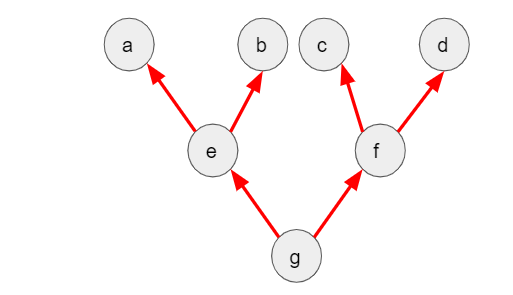

# **여러 번 재사용되는 텐서**
- 기본 버전의 자동 미분에는 꽤 귀찮은 버그가 있습니다. 버그를 박살 내봅시다!

> Tensor의 현재 버전은 변수로의 역전파를 1회만 지원한다. 하지만 순전파하는 동안 텐서(가중치) 하나를 여러 번 재사용해야 하고 그래프의 각 부분은 경사도를 동일한 텐서로 역전파 한다. 하지만 여러 번 사용된 변수로 역전파를 수행하면 정확한 경사도를 계산하기 어렵다.

In [16]:
a = Tensor([1,2,3,4,5])
b = Tensor([2,2,2,2,2])
c = Tensor([5,4,3,2,1])

d = a + b
e = b + c
f = d + e
f.backward(Tensor(np.array([1,1,1,1,1])))

b.grad.data == np.array([2,2,2,2,2])

array([False, False, False, False, False])

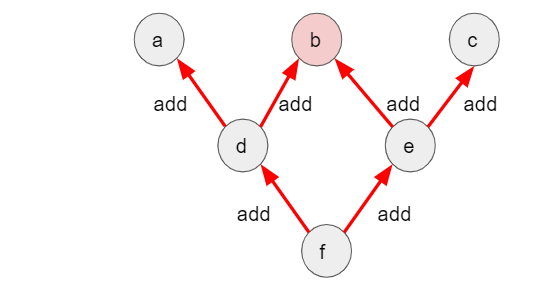

# **텐서 재사용을 위한 자동 미분 업그레이드**

- 함수를 하나 새로 추가하고, 기존 함수 3개를 수정합니다.
> Tensor 객체에 새로운 기능 두 가지 추가!
>
> 첫 번째, 경사도를 누적해서 변수가 한 번 이상 사용될 때 해당 변수가 모든 자식(children)으로부터 경사도를 수신할 수 있도록 하는 기능
>
>두 번째, `all_children_grads_accounted_for()` 함수.
>
> 목적 : **텐서가 그래프 내의 모든 자식으로부터 경사도를 수신했는 지를 계산하는 것.** 한 그래프 안에서 중간 변수에 대해 .backward() method가 호출될 때마다 해당 변수의 부모에 대해 .backward() method가 즉시 호출되는 것이 보통. 하지만 어떤 변수는 여러 부모로 부터 경사도를 수신하므로 각 변수는 지역적으로 최종 경사도를 가질 때까지 부모에 대해 .backward() method를 호출할 때까지 기다려야 한다.


In [36]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,         #method의 매개변수 지정
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):    #id가 없을 시, 100000이내의 범위에서 무작위로 지정해 넣어줌.
            self.id = np.random.randint(0,100000)
        else:              #id 있으면, 그대로 사용
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        

        #---tensor가 연산할 수 있는 노드가 얼마나 있는지 찾는 과정---#

        if(creators is not None):       #creators가 있을 때, 즉, 연산할 node가 있을 때
            for c in creators:          #array로 지정된 각 노드값들에 대해서
                if(self.id not in c.children):  #지정해준 id가 c.children에 들어가있지 않으면
                    c.children[self.id] = 1     #1을 넣어주고
                else:                           
                    c.children[self.id] += 1    #c.children에 들어가있는 경우, 1을 더해줌



    #---tensor가 연산이 진행되는 방향의 노드들로부터 수신한 경사도 개수가 일치하는지 확인---#

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):     
                return False
        return True        
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
            if(grad is None): #grad가 없을 경우, 주어진 array와 동일한 것을 반환
                grad = FloatTensor(np.ones_like(self.data))
            
            if(grad_origin is not None): #주어진 grad가 있을 경우 
                if(self.children[grad_origin.id] == 0): # grad가 0이면, 넣어준 경고문 반환
                    raise Exception("cannot backprop more than once")
                else: # grad가 0이 아니면 children에 대해 해당 id 하나를 빼줌.(계산했으니 다음으로 넘어가는 과정)
                    self.children[grad_origin.id] -= 1


            #---여러 개의 경사도를 누적하는 과정---#

            if(self.grad is None): #만약 grad가 없으면 그대로 넘어가고
                self.grad = grad
            else:                  #있으면 grad를 더하는 연산을 해줌
                self.grad += grad
            

            # assert : 가설설정문으로, 뒤의 조건이 true가 아닌 경우, Asserterror를 발생시킴
            assert grad.autograd == False
            
            # 역전파 할 grad가 있는 경우에만 계속 시행됨.
            #--- 역전파가 시행되는 부분 ---#
            if(self.creators is not None and     #계산할 노드가 아직 남아있고
               (self.all_children_grads_accounted_for() or #연산이 진행되는 노드들의 grad가 없거나 넘어온 grad가 없을 때
                grad_origin is None)):

                if(self.creation_op == "add"):  #더하는 연산을 해줬다면,
                    self.creators[0].backward(self.grad, self) # 0번째에 있는 노드에 역전파
                    self.creators[1].backward(self.grad, self) # 1번째에 있는 노드에 역전파
                    
    #--- 더하는 연산에 대한 설정 ---#                
    def __add__(self, other):
        if(self.autograd and other.autograd): #자기 자신의 자동 미분과 다른 값에 대한 자동미분이 들어오면
            return Tensor(self.data + other.data, # 각각의 데이터를 더해주고
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data) #반환값

    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + b
e = b + c
f = d + e


f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad.data == np.array([2,2,2,2,2]))

[ True  True  True  True  True]


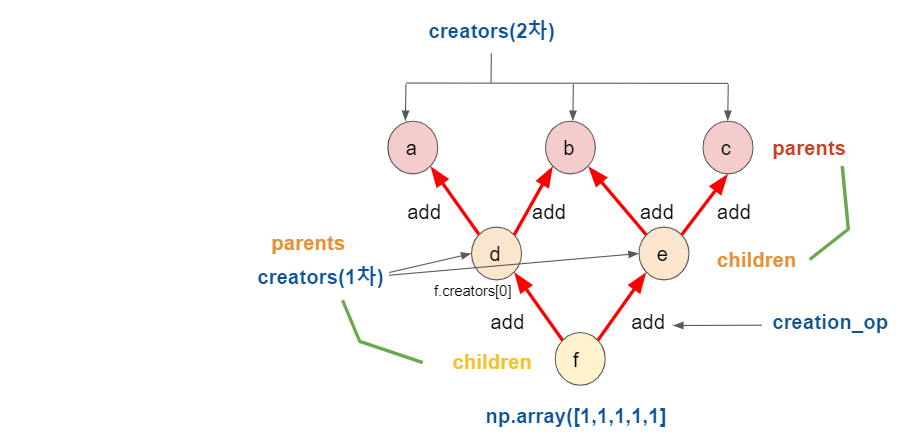

In [38]:
print("f.id: ", f.id)
print("d.id: ",d.id)
print("e.id: ",e.id)
print("a.id: ",a.id)
print("b.id: ",b.id)
print("c.id: ",c.id)
print("                               ")
print("a.creators: ", a.creators)
print("b.creators: ", b.creators)
print("c.creators: ", c.creators)
print("d.creators: ", d.creators)
print("e.creators: ", e.creators)
print("f.creators: ", f.creators)

f.id:  45447
d.id:  17939
e.id:  20010
a.id:  95628
b.id:  71046
c.id:  78933
                               
a.creators:  None
b.creators:  None
c.creators:  None
d.creators:  [array([1, 2, 3, 4, 5]), array([2, 2, 2, 2, 2])]
e.creators:  [array([2, 2, 2, 2, 2]), array([5, 4, 3, 2, 1])]
f.creators:  [array([3, 4, 5, 6, 7]), array([7, 6, 5, 4, 3])]


In [0]:
d.backward(Tensor(np.array([1,1,1,1,1])))
print(f.id)

# **덧셈 역전파는 어떻게 이루어질까요?**
- 더 많은 함수를 지원하는 방법을 배우기 위해 추상화를 공부합시다.

> Tensor class에 함수를 추가하고 `.backward()` method에 미분계수를 더해 임의의 연산을 할 수 있게 되었다. 덧셈 method를 구현해보자.

In [0]:
#--- 더하는 연산에 대한 설정 ---#                
    def __add__(self, other):
        if(self.autograd and other.autograd): #자기 자신의 자동 미분과 다른 값에 대한 자동미분이 들어오면
            return Tensor(self.data + other.data, # 각각의 데이터를 더해주고
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data) #반환값


### self.autograd == other.autograd == True일 때만 self.autograd == True 임!

In [0]:
 #--- 역전파가 시행되는 부분 ---#
            if(self.creators is not None and     #계산할 노드가 아직 남아있고
               (self.all_children_grads_accounted_for() or #연산이 진행되는 노드들의 grad가 없거나 넘어온 grad가 없을 때
                grad_origin is None)):

             -->   if(self.creation_op == "add"):  #더하는 연산을 해줬다면,
                     self.creators[0].backward(self.grad, self) # 0번째에 있는 노드에 역전파
                     self.creators[1].backward(self.grad, self) # 1번째에 있는 노드에 역전파

class 내부 어디에도 덧셈 연산자는 처리되지 않았다. 일반화 역전파 논리가 추상화 되어 제거된 것이므로 덧셈이 필요한 부분은 위 두 코드에 모두 정의되어 있다.
> `.backward()`를 덧셈에 사용되는 두 변수에 대해 각각 한 번씩 (총 두 번) 호출한다는 것도 기억하기! 하지만 해당 변수가 autograd를 꺼놓는 경우 **(self.autograd == False)**, 역전파를 거르기도 하는데 이 부분에 대한 검사는 .backward() method에서 이루어짐.

In [0]:
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
            if(grad is None): #grad가 없을 경우, 주어진 array와 동일한 것을 반환
                grad = FloatTensor(np.ones_like(self.data))
            
            if(grad_origin is not None): #주어진 grad가 있을 경우 
                if(self.children[grad_origin.id] == 0): # grad가 0이면, 넣어준 경고문 반환
                    raise Exception("cannot backprop more than once")
                else: # grad가 0이 아니면 children에 대해 해당 id 하나를 빼줌.(계산했으니 다음으로 넘어가는 과정)
                    self.children[grad_origin.id] -= 1

              .....

# **부정 연산 지원하기**

- 덧셈 지원 코드를 수정해서 부정 연산 지원을 구현해봅시다.

> 몇 가지를 수정해 부정 연산에 대한 자동 미분 지원기능을 추가해보자.

In [0]:
def __add__(self, other):
    if(self.autograd and other.autograd):
        return Tensor(self.data + other.data,
                      autograd=True,
                      creators=[self,other],
                      creation_op="add")
    return Tensor(self.data + other.data)

def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1) 

**neg 연산자를 추가한 코드**

In [0]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True        
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
            if(grad is None):
                grad = FloatTensor(np.ones_like(self.data))
            
            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1) 
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())

In [46]:
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + (-b)
e = (-b) + c
f = d + e

f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad)

[-2 -2 -2 -2 -2]


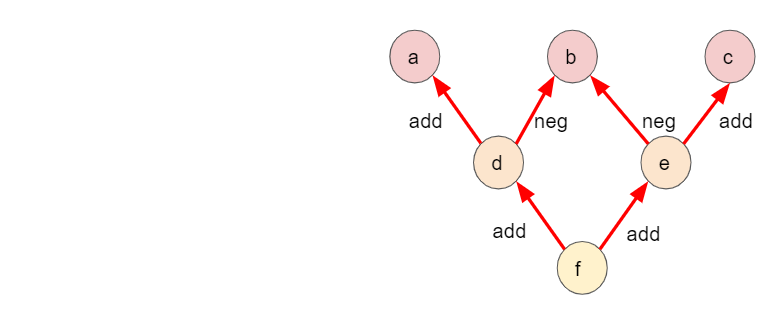

# **몇 가지 함수 더 지원하기**
- 뺄셈, 곱셈, 총합, 전개, 전치 그리고 행렬 곱셈

In [0]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())

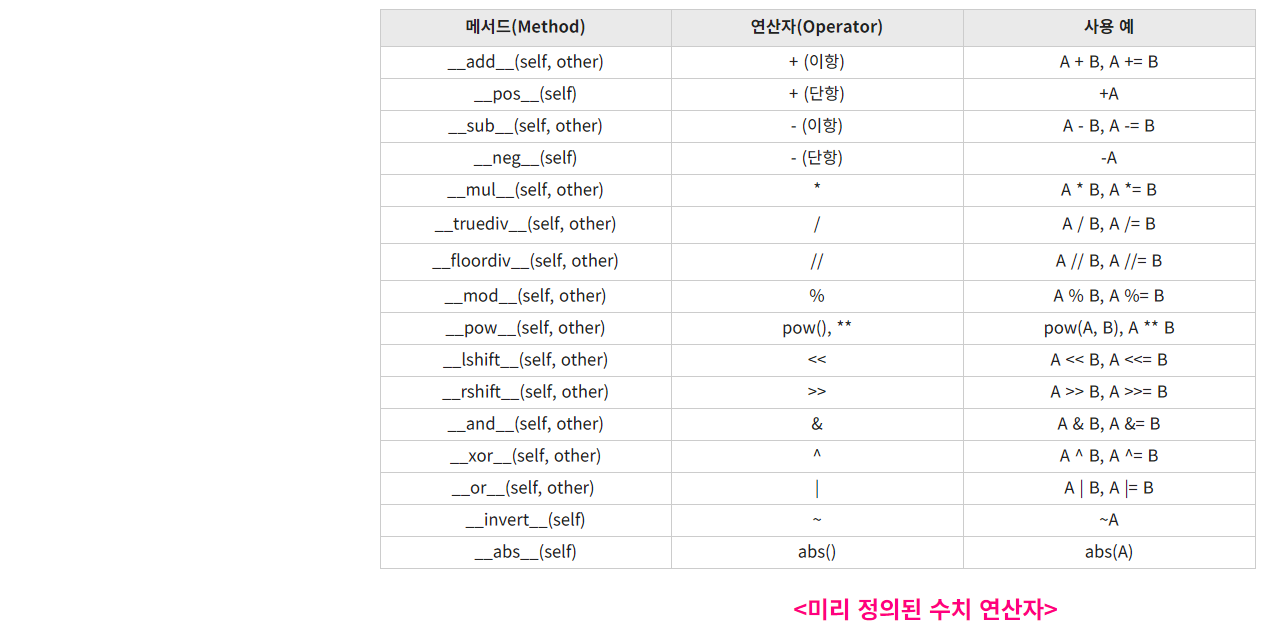

In [49]:
#--- sum이랑 expand 추가 설명 ---#


x = Tensor(np.array([[1,2,3],
                     [4,5,6]]))

#sum은 한 차원에 대한 총합을 구함(차원 제거)
print(x.sum(0))
print(x.sum(1))

[5 7 9]
[ 6 15]


In [52]:
# 차원을 따라 데이터를 복사함.(차원 추가)
x.expand(dim=2, copies=4)

array([[[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]],

       [[4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6]]])

In [55]:
# 차원을 따라 데이터를 복사함.(차원 추가)
x.expand(dim=0, copies=4)

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [56]:
x.expand(dim=3, copies=2)

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[4, 4],
        [5, 5],
        [6, 6]]])

In [0]:
                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    act = self.creators[0]     # 보통은 activation
                    weights = self.creators[1] # 보통은 weights 행렬
                    new = self.grad.mm(c1.transpose())
                    act.backward(new)
                    new = self.grad.transpose().mm(act).transpose()
                    weights.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                    self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))

신경망 역전파하는 코드 리뉴얼. 더 간편하게!

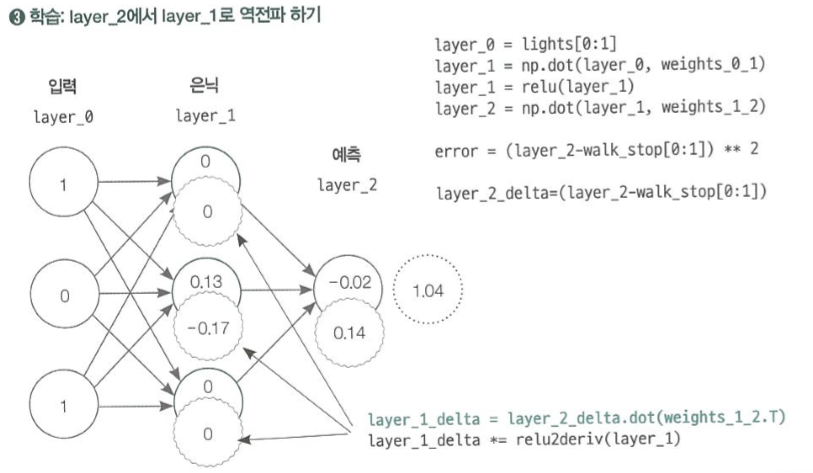

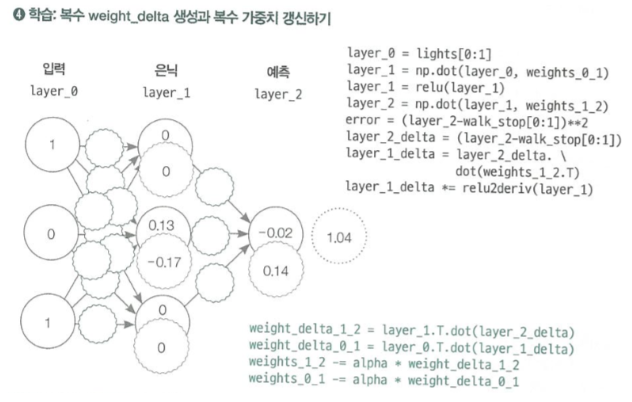